### Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

#### Data Set Characteristics:
  - Number of Instances: 442
  - Number of Attributes: First 10 columns are numeric predictive values
  - Target: Column 11 is a quantitative measure of disease progression one year after baseline
  - Attribute Information:    
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, T-Cells (a type of white blood cells)
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, thyroid stimulating hormone
    - s5      ltg, lamotrigine
    - s6      glu, blood sugar level

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [34]:
# Load the Diabetes dataset
diabetes = load_diabetes()
# convert data to pandas dataframe
#df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#X = diabetes.data
#Y = diabetes.target
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
Y = pd.DataFrame(diabetes.target, columns=["Progression"])

In [20]:
# prinitng first five entries
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [25]:
#description about dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [26]:
# columns
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [35]:
Y

,Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


This is the variable that we would like to predict based on the other features in the dataset. It’s a continuous variable, and its values range from 25 to 346. In other words, it provides a measure of how much a patient’s diabetes has progressed after one year. The higher the target value, the more the disease has progressed. 

In [36]:
# We will split the data into training and testing data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

In [41]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [42]:
model.fit(train_x,train_y)

LinearRegression()

In [46]:
# Predict the outcomes for the test set
test_y_pred = model.predict(test_x)

# Calculate the metrics
mse = mean_squared_error(test_y, test_y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_y, test_y_pred)
r2 = r2_score(test_y, test_y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3157.972848565651
Root Mean Squared Error (RMSE): 56.19584369475781
Mean Absolute Error (MAE): 45.702167567052626
R-squared (R²): 0.4545709909725648


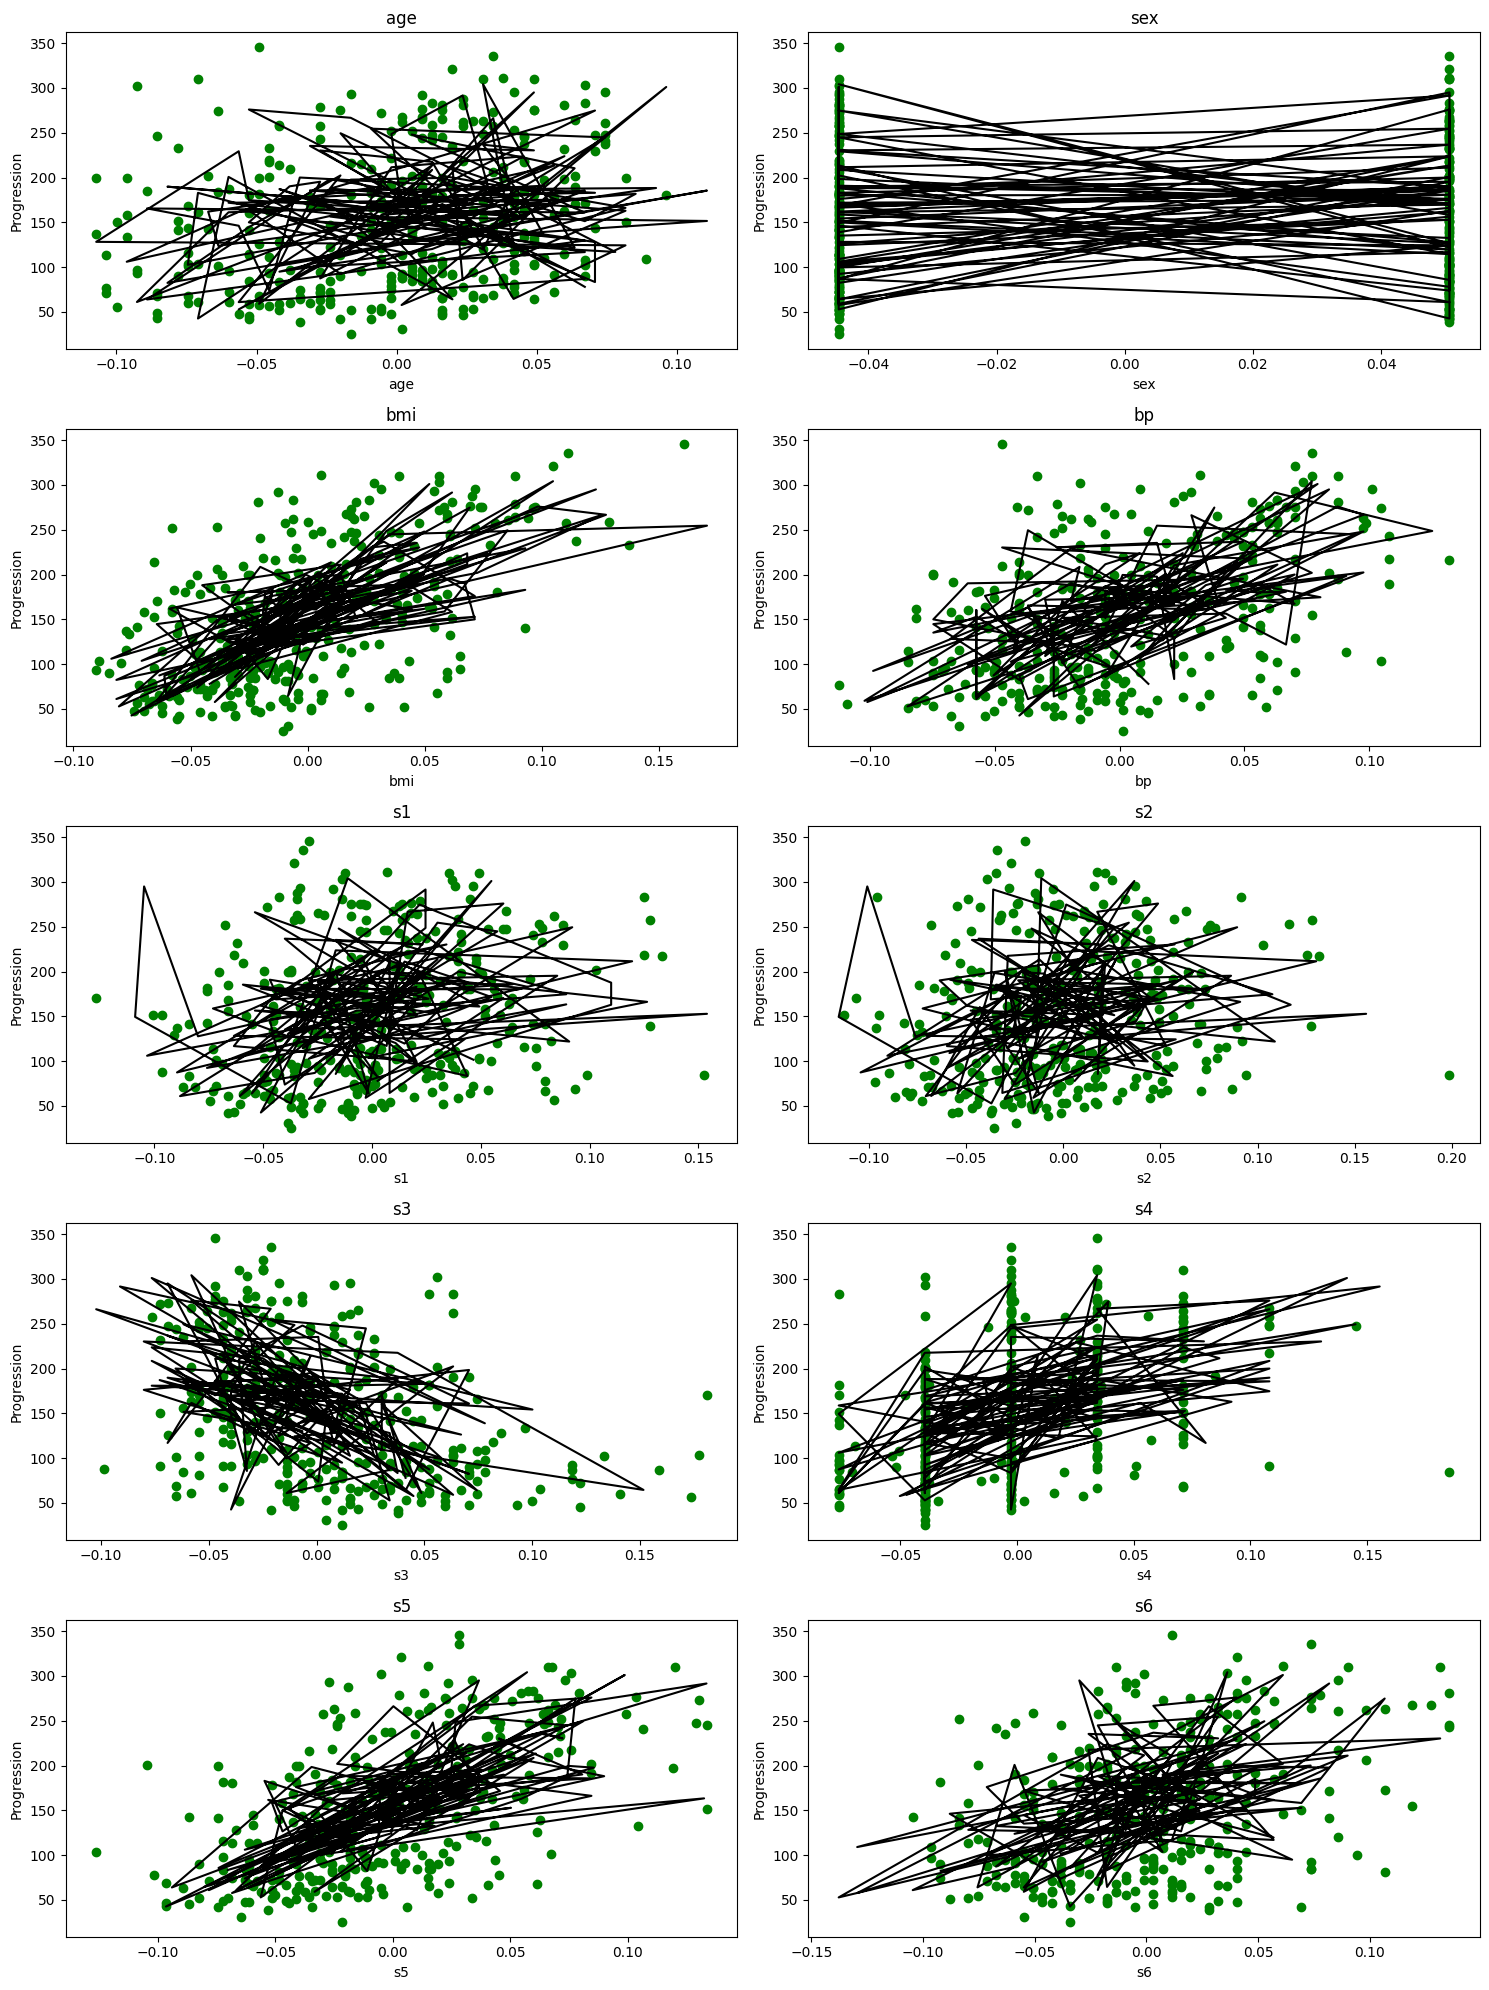

In [56]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20)) # Adjust as needed

# Assume train_x is a DataFrame
features = train_x.columns
for i, feature in enumerate(features):
    # Calculate row and column index
    row = i // 2
    col = i % 2

    # Create scatter plot for this feature
    axs[row, col].scatter(train_x[feature], train_y, color='g')
    axs[row, col].plot(test_x[feature], model.predict(test_x), color='k')

    # Set title and labels
    axs[row, col].set_title(feature)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Progression')

# Show the plot
plt.tight_layout()
plt.show()


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
train_x_pca = pca.fit_transform(train_x)

pca = PCA(n_components=1)
test_x_pca = pca.fit_transform(test_x)

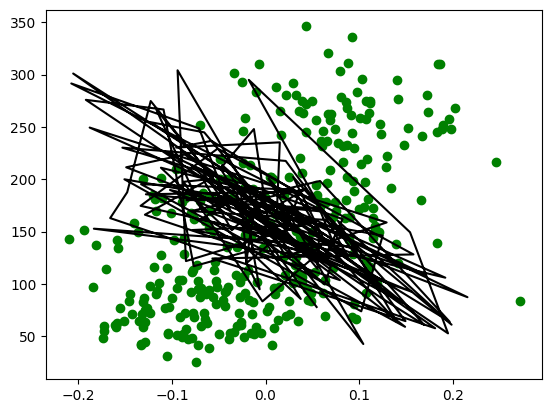

In [59]:
plt.scatter(train_x_pca, train_y,color='g')
plt.plot(test_x_pca, test_y_pred,color='k')

plt.show()

In [12]:
# Specify the filename for saving the model
model_filename = 'linear_regression_diabetes_model.bin'

# Save only the trained model to a binary file
with open(model_filename, 'wb') as f_out:
    pickle.dump(model, f_out)

print(f"Model saved to {model_filename}")


Model saved to linear_regression_diabetes_model.bin


In [13]:
import pickle

# Specify the filename of the saved model
model_filename = 'linear_regression_diabetes_model.bin'

# Load the saved model
with open(model_filename, 'rb') as f_in:
    loaded_model = pickle.load(f_in)

# Define a new data point for prediction (use as many features as needed)
new_data_point = np.array([[0.05, 0.07]])  # Change these values with your input

# Use the loaded model to make predictions
predicted_value = loaded_model.predict(new_data_point)

print(f'Predicted Value: {predicted_value[0]:.2f}')


Predicted Value: 167.07
